<div align="center">
  <h2>LINEAR REGRESSION</h2>
</div>


### *Importing libraries* 

In [85]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import train_test_split
import  matplotlib.pyplot as plt

### *Loading and preprocessing dataset*

In [6]:
data = pd.read_csv("C:/Users/Pranjal Oza/Elevate_Lab/Google_Stock_Price.csv")
data

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,GOOG,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,GOOG,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,GOOG,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
3,GOOG,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,GOOG,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1756,GOOG,2024-12-24,196.169998,197.669998,195.197998,197.570007,6809800,197.570007,0.0,0.0
1757,GOOG,2024-12-26,196.740005,198.160004,195.869995,197.100006,7907900,197.100006,0.0,0.0
1758,GOOG,2024-12-27,196.470001,196.800003,191.972000,194.039993,14693000,194.039993,0.0,0.0
1759,GOOG,2024-12-30,190.865005,193.779999,190.360001,192.690002,12209500,192.690002,0.0,0.0


In [7]:
data.head()

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,GOOG,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,GOOG,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,GOOG,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
3,GOOG,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,GOOG,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1761 entries, 0 to 1760
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   symbol     1761 non-null   object 
 1   date       1761 non-null   object 
 2   open       1761 non-null   float64
 3   high       1761 non-null   float64
 4   low        1761 non-null   float64
 5   close      1761 non-null   float64
 6   volume     1761 non-null   int64  
 7   adjclose   1761 non-null   float64
 8   dividends  1761 non-null   float64
 9   splits     1761 non-null   float64
dtypes: float64(7), int64(1), object(2)
memory usage: 137.7+ KB


In [9]:
data.dropna()

,symbol,date,open,high,low,close,volume,adjclose,dividends,splits
0,GOOG,2018-01-02,52.417000,53.347000,52.261501,53.250000,24752000,53.059353,0.0,0.0
1,GOOG,2018-01-03,53.215500,54.314499,53.160500,54.124001,28604000,53.930225,0.0,0.0
2,GOOG,2018-01-04,54.400002,54.678501,54.200100,54.320000,20092000,54.125519,0.0,0.0
3,GOOG,2018-01-05,54.700001,55.212502,54.599998,55.111500,25582000,54.914188,0.0,0.0
4,GOOG,2018-01-08,55.111500,55.563499,55.081001,55.347000,20952000,55.148846,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
1756,GOOG,2024-12-24,196.169998,197.669998,195.197998,197.570007,6809800,197.570007,0.0,0.0
1757,GOOG,2024-12-26,196.740005,198.160004,195.869995,197.100006,7907900,197.100006,0.0,0.0
1758,GOOG,2024-12-27,196.470001,196.800003,191.972000,194.039993,14693000,194.039993,0.0,0.0
1759,GOOG,2024-12-30,190.865005,193.779999,190.360001,192.690002,12209500,192.690002,0.0,0.0


In [14]:
data.describe()

,open,high,low,close,volume,adjclose,dividends,splits
count,1761.000000,1761.000000,1761.000000,1761.000000,1.761000e+03,1761.000000,1761.000000,1761.000000
mean,102.021411,103.171589,100.982265,102.092157,2.859376e+07,101.754831,0.000341,0.011357
std,39.637483,40.020994,39.274690,39.637305,1.317064e+07,39.547744,0.008250,0.476596
min,48.695000,50.176998,48.505501,48.811001,6.809800e+06,48.636250,0.000000,0.000000
25%,61.463001,62.043999,60.938499,61.496498,1.992200e+07,61.276325,0.000000,0.000000
50%,100.059998,101.658997,99.169998,100.739998,2.561200e+07,100.379326,0.000000,0.000000
75%,135.570007,137.070999,134.183502,135.990005,3.304600e+07,135.503128,0.000000,0.000000
max,198.529999,202.880005,196.690002,198.160004,1.241400e+08,198.160004,0.200000,20.000000


<div align= 'center'>
    <h3>========= SIMPLE LINEAR REGRESSION ==========</h3>
</div>

In [71]:
x_simple = data[['open']]
y = data['close']
x_train_s,x_test_s,y_train_s,y_test_s = train_test_split(x_simple,y,test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(x_train_s,y_train_s)

LinearRegression()

In [72]:
y_pred_s = model_simple.predict(x_test_s)

<div align="center">
    <h3> ========== MULTIPLE LINEAR REGRESSION =========== </h3>
</div>

In [67]:
features = ['open', 'high', 'low', 'volume']
x_multi = data[features]
x_train_m, x_test_m, y_train_m, y_test_m = train_test_split(x_multi, y, test_size=0.2, random_state=42)
model_multi = LinearRegression()
model_multi.fit(X_train_m, y_train_m)


LinearRegression()

In [68]:
y_pred_m = model_multi.predict(X_test_m)

### *Evaluation metrics*

In [69]:
def evaluate_model(name, y_true, y_pred):
    print(f"\n{name} Regression Results:")
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("MSE:", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))

evaluate_model("Simple", y_test_s, y_pred_s)
evaluate_model("Multiple", y_test_m, y_pred_m)


Simple Regression Results:
MAE: 1.1947968959453268
MSE: 2.8630740146344786
R² Score: 0.998241470847022

Multiple Regression Results:
MAE: 0.5025305192076236
MSE: 0.5033921076926549
R² Score: 0.9996908114522252


### *Coefficients*

In [73]:
print("\nSimple Linear Regression Coefficient and Intercept:")
print(f"open: {model_simple.coef_[0]}")
print(f"intercept: {model_simple.intercept_}")

print("\nMultiple Linear Regression Coefficients and Intercept:")
for feature, coef in zip(features, model_multi.coef_):
    print(f"{feature}: {coef}")
print(f"intercept: {model_multi.intercept_}")


Simple Linear Regression Coefficient and Intercept:
open: 0.9985972667850506
intercept: 0.19076458141481112

Multiple Linear Regression Coefficients and Intercept:
open: -0.5806048592368422
high: 0.7102060240407744
low: 0.871511214209045
volume: 1.4356551849813243e-09
intercept: 0.011721097294852711


### *Regression line plots*

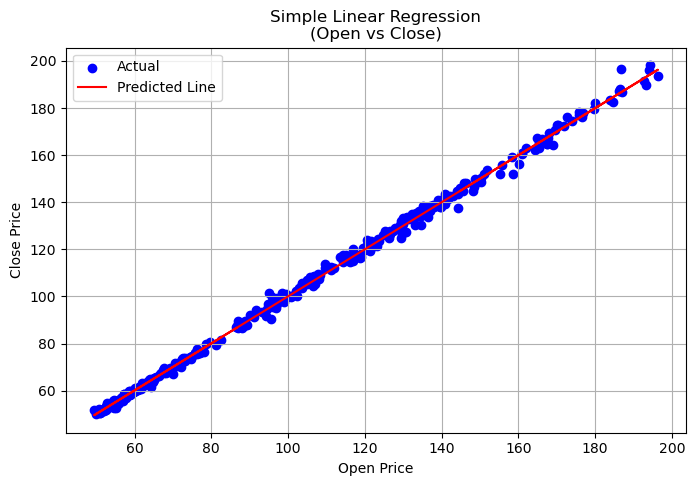

In [78]:
plt.figure(figsize=(8, 5))
plt.scatter(x_test_s, y_test_s, color='blue', label='Actual')
plt.plot(x_test_s, y_pred_s, color='red', label='Predicted Line')
plt.title('Simple Linear Regression\n(Open vs Close)')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.legend()
plt.grid(True)

- The red regression line shows a very tight fit to the actual values.
- The near-1 slope indicates a strong linear relationship between Open and Close prices.

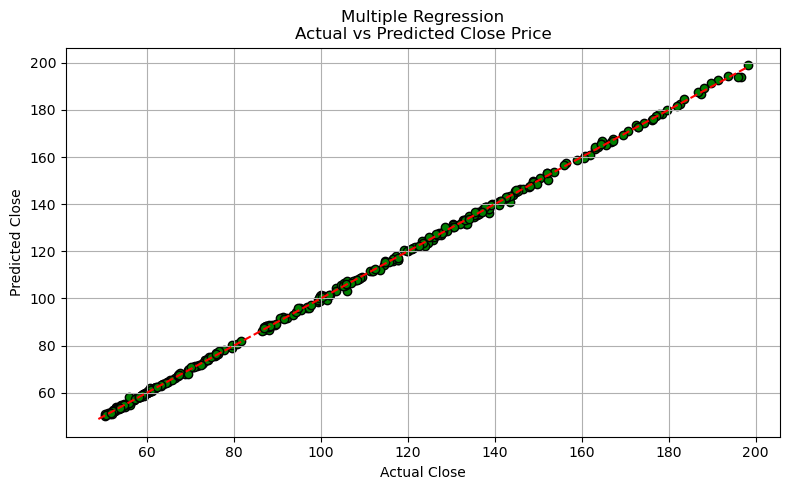

In [79]:
plt.figure(figsize=(8, 5))
plt.scatter(y_test_m, y_pred_m, color='green', edgecolor='k')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.title('Multiple Regression\nActual vs Predicted Close Price')
plt.xlabel('Actual Close')
plt.ylabel('Predicted Close')
plt.grid(True)

plt.tight_layout()
plt.show()

- The green dots show how close the predictions are to the true values.
- Most of the dots touches the red diagonal line, showing excellent predictive performance.
- This means the multiple regression model is doing a very good job using open, high, low, and volume together to predict the close price.


### *Coefficients Interpretation*

#### Simple linear regression

- Here, slope ≈ 0.999 which means for every  1 unit increase in Open price, the Close price increases by about 0.999 units, assuming all else is constant.
- Intercept ≈ 0.191 which means when Open price is 0 (theoretically), the predicted Close price would be around 0.191.

#### Multi linear regression

- Here, Open ≈ -0.581 which means for every 1 unit increase in Open price, the Close price decreases by about 0.581 units, assuming high, low, and volume remain constant.
- High ≈ 0.710 which shows that for every 1 unit increase in High price, the Close price increases by about 0.710 units, assuming other factors are constant.
- Low ≈ 0.872 which mean for every 1 unit increase in Low price, the Close price increases by about 0.872 units, holding other predictors fixed.
- Volume ≈ 1.44 × 10⁻⁹ mean for every 1 unit increase in trading volume, the Close price increases by a very tiny amount (0.00000000144 units) — effectively negligible.
- Intercept ≈ 0.012 shows that when open, high, low, and volume are all 0 (not realistic), the model predicts a Close price of approximately 0.012. This is just a baseline adjustment.

<div align = 'center'>
 <h3> THANK YOU </h3>
</div>